<a href="https://colab.research.google.com/github/moosa200/telecom-churn-analysis/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Telco customer churn.csv to Telco customer churn (8).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 no

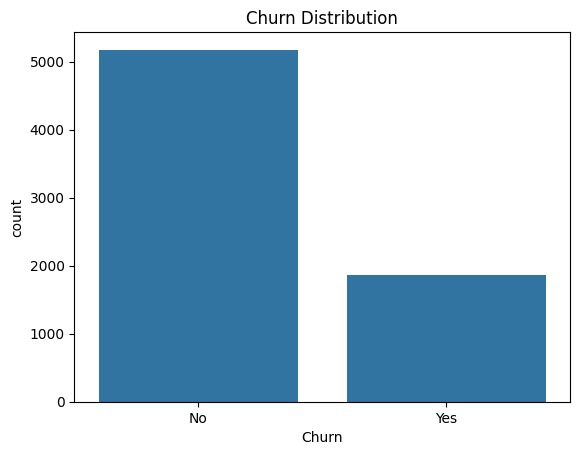

   TotalCustomers
0            7043
   ChurnedCustomers
0              1869


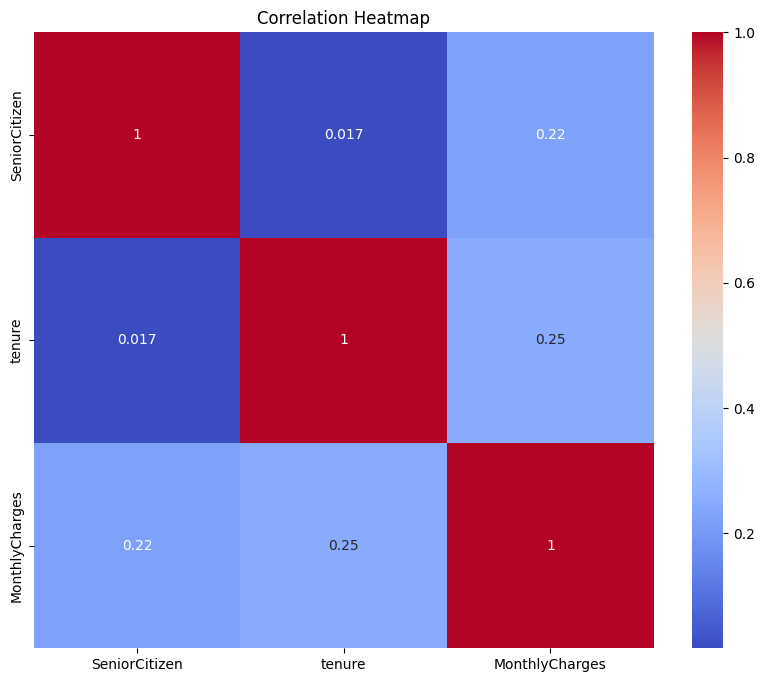

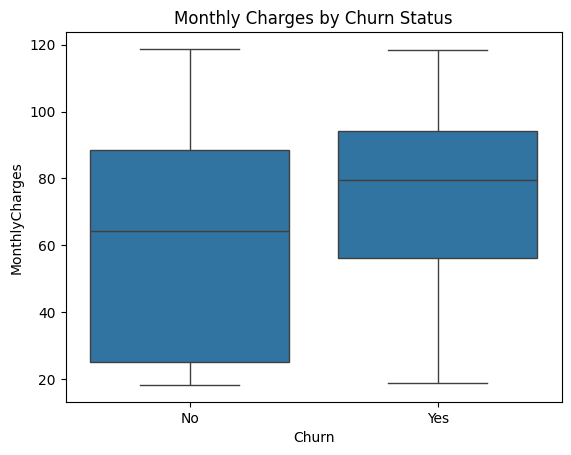

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Telco customer churn.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()
import seaborn as sns
import matplotlib.pyplot as plt
# Plot churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()
import sqlite3

# Create an SQLite database in memory
conn = sqlite3.connect(':memory:')

# Load the Pandas DataFrame into SQLite
df.to_sql('telco_customer_churn', conn, index=False, if_exists='replace')
# Example SQL query: Count total customers
query = "SELECT COUNT(*) AS TotalCustomers FROM telco_customer_churn"
result = pd.read_sql_query(query, conn)
print(result)

# Example SQL query: Count churned customers
query = "SELECT COUNT(*) AS ChurnedCustomers FROM telco_customer_churn WHERE Churn = 'Yes'"
result = pd.read_sql_query(query, conn)
print(result)

# Filter numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.show()

# Save as CSV
df.to_csv('Processed_Telco_Churn.csv', index=False)

# Download the file
from google.colab import files
files.download('Processed_Telco_Churn.csv')

